# Importing Libraries

In [1]:
# Basic Library
import pandas as pd
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Importing libraries for statistical test
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# t-test
from scipy.stats import ttest_ind
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)


In [2]:
data=pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [4]:
data.shape

(26707, 34)

In [5]:
26707*0.50        # 50% of the records should be 13353

13353.5

In [6]:
data.isnull().sum()     # it has missing values but none of the data has >70% - 80& missing values if the data having having >70% missing values we were removing the columns. now we are going to fill the missing values with mean

unique_id                  0
h1n1_worry                92
h1n1_awareness           116
antiviral_medication      71
contact_avoidance        208
                        ... 
employment              1463
census_msa                 0
no_of_adults             249
no_of_children           249
h1n1_vaccine               0
Length: 34, dtype: int64

In [7]:
a=data.isnull().sum()

In [8]:
a[a.values>18694]     # none of the data has greater than 70% of missing values

Series([], dtype: int64)

In [9]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [10]:
data.isnull().sum()

unique_id                  0
h1n1_worry                92
h1n1_awareness           116
antiviral_medication      71
contact_avoidance        208
                        ... 
employment              1463
census_msa                 0
no_of_adults             249
no_of_children           249
h1n1_vaccine               0
Length: 34, dtype: int64

Text(0.5, 1.0, 'Heat map of entire data to visualize the missing values')

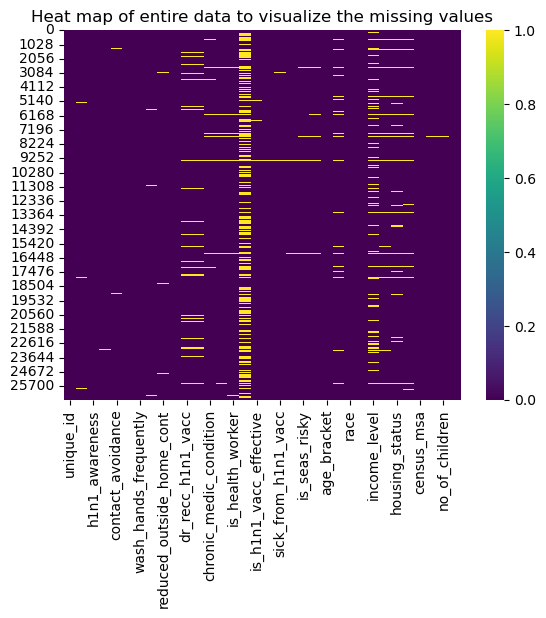

In [11]:
sns.heatmap(data.isnull(),cmap='viridis')
plt.title('Heat map of entire data to visualize the missing values')

# working on Target variable     [here h1n1_vaccine is a target variabel]

## h1n1_vaccine is a categorical variable

In [12]:
data.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [13]:
data.h1n1_vaccine.value_counts(normalize=True)*100

0    78.754634
1    21.245366
Name: h1n1_vaccine, dtype: float64

In [14]:
data.h1n1_vaccine.isnull().sum()    # their is no null values in the data

0

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

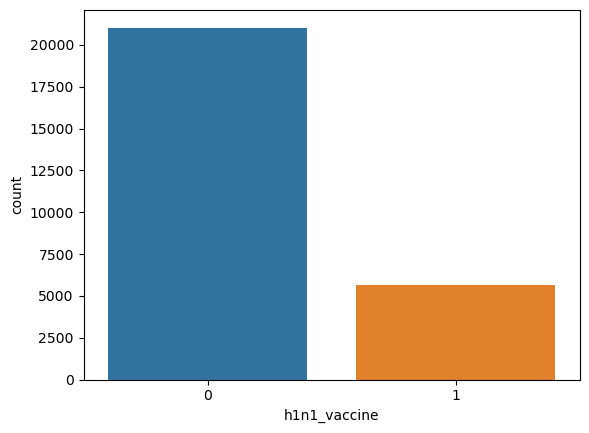

In [15]:
# count plot
sns.countplot(data.h1n1_vaccine)
# 1 - is recived the h1n1 vaccine
# 0 - is not recived the h1n1 vaccine

In [16]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [17]:
data.shape

(26707, 34)

## h1n1_worry

In [18]:
data.h1n1_worry.isnull().sum()

92

In [19]:
data.h1n1_worry.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [20]:
data.h1n1_worry.mode().iloc[0]

2.0

In [21]:
data.h1n1_worry.fillna(data.h1n1_worry.mode().iloc[0],inplace=True)

In [22]:
data.h1n1_worry.isnull().sum()

0

Text(0.5, 1.0, 'Countplot of h1n1.worry')

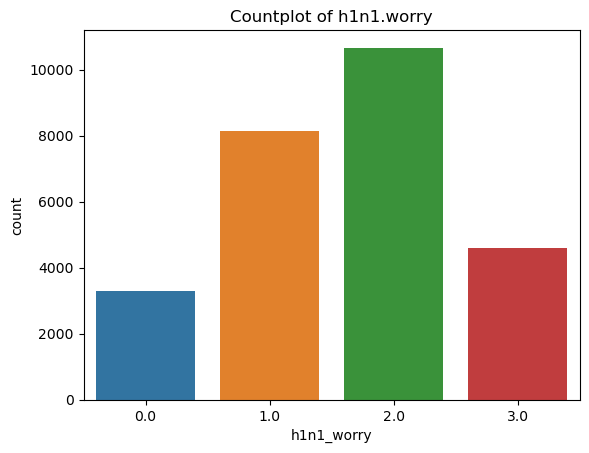

In [23]:
sns.countplot(data.h1n1_worry)
plt.title('Countplot of h1n1.worry')

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

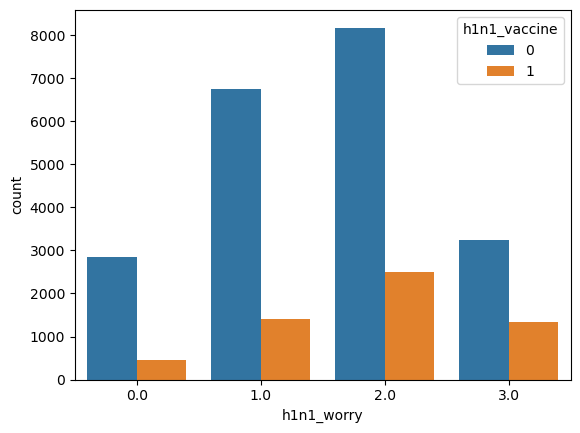

In [24]:
sns.countplot(data.h1n1_worry,hue=data.h1n1_vaccine)

In [25]:
# Chi-Square Test
ct_h1n1_worry=pd.crosstab(data.h1n1_worry,data.h1n1_vaccine)
ct_h1n1_worry

h1n1_vaccine,0,1
h1n1_worry,,
0.0,2849,447
1.0,6756,1397
2.0,8178,2489
3.0,3250,1341


Overall Counts: We can see the number of individuals falling into different combinations of worry levels and vaccine status. For example, there are 2849 individuals who have a worry level of 0.0 and have not received the H1N1 vaccine (h1n1_vaccine = 0).

In [26]:
chi2_contingency(ct_h1n1_worry,correction=False)

(400.4620379252815,
 1.7582253892199257e-86,
 3,
 array([[2595.752724  ,  700.247276  ],
        [6420.86527877, 1732.13472123],
        [8400.75676789, 2266.24323211],
        [3615.62522934,  975.37477066]]))

### p-value is 1.75e-86 which is <0.05 where null hypothesis is rejected and it is a good predictor

## h1n1_worry  is a good predictor

# h1n1_awareness is a categorical variable

In [27]:
data.h1n1_awareness.isnull().sum()

116

In [28]:
data.h1n1_awareness.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [29]:
data.h1n1_awareness.fillna(data.h1n1_awareness.mode().iloc[0],inplace=True)

In [30]:
data.h1n1_awareness.isnull().sum()

0

<AxesSubplot:xlabel='h1n1_awareness', ylabel='count'>

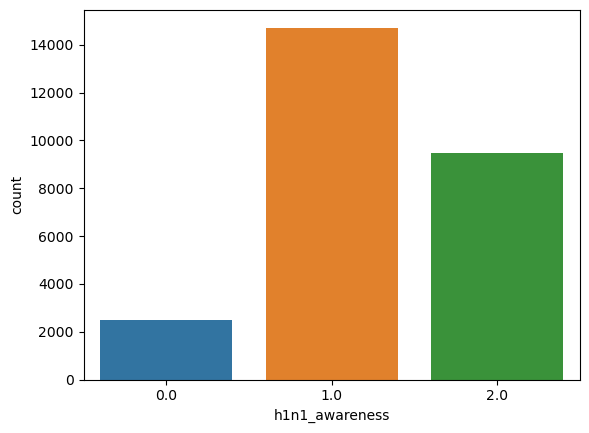

In [31]:
sns.countplot(data.h1n1_awareness)

<AxesSubplot:xlabel='h1n1_awareness', ylabel='count'>

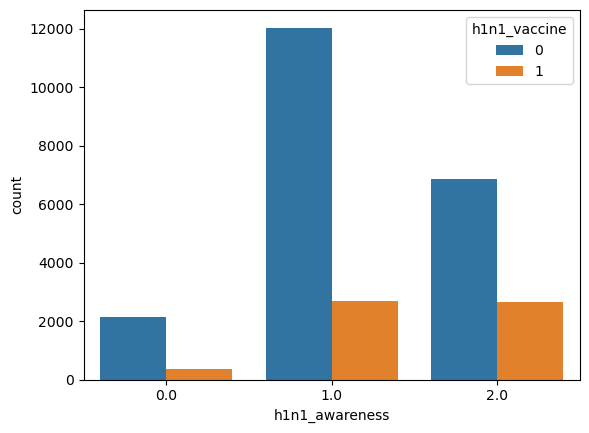

In [32]:
sns.countplot(data.h1n1_awareness,hue=data.h1n1_vaccine)

In [33]:
ct_h1n1_awareness=pd.crosstab(data.h1n1_awareness,data.h1n1_vaccine)
ct_h1n1_awareness

h1n1_vaccine,0,1
h1n1_awareness,,
0.0,2145,361
1.0,12039,2675
2.0,6849,2638


In [34]:
chi2_contingency(ct_h1n1_awareness,correction=False)

(396.7931990299987,
 6.877832615401085e-87,
 2,
 array([[ 1973.59111843,   532.40888157],
        [11587.95679035,  3126.04320965],
        [ 7471.45209121,  2015.54790879]]))

p_values = 6.877832615401085e-87 is < 0.05 so ct_h1n1_awareness is a good predictor

## h1n1_awareness is a good predictor

In [35]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# antiviral_medication

In [36]:
data.antiviral_medication.isnull().sum()

71

In [37]:
data.antiviral_medication.value_counts()

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64

In [38]:
data.antiviral_medication.fillna(data.antiviral_medication.mode().iloc[0],inplace=True)

In [39]:
data.antiviral_medication.isnull().sum()

0

<AxesSubplot:xlabel='antiviral_medication', ylabel='count'>

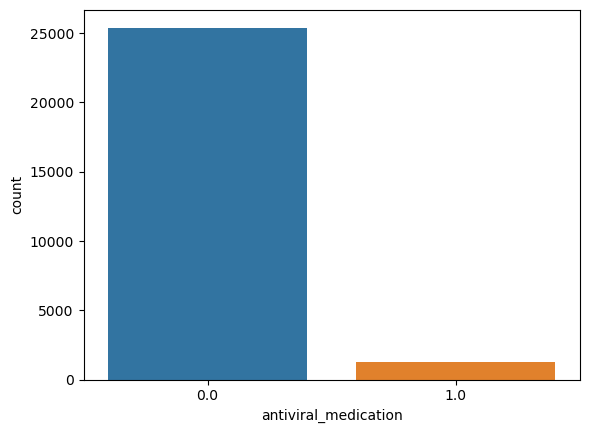

In [40]:
sns.countplot(data.antiviral_medication)

<AxesSubplot:xlabel='antiviral_medication', ylabel='count'>

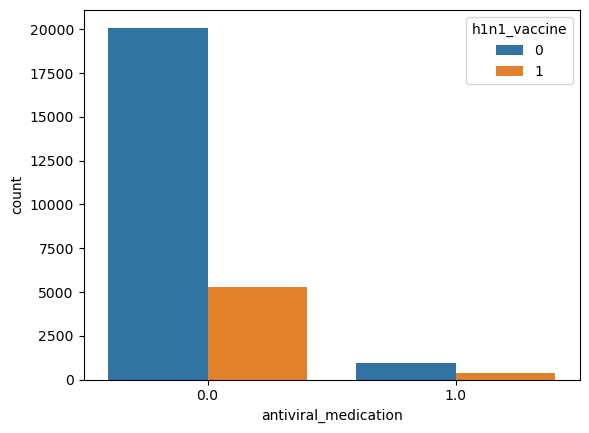

In [41]:
sns.countplot(data.antiviral_medication,hue=data.h1n1_vaccine)

In [42]:
ct_antiviral_medication=pd.crosstab(data.antiviral_medication,data.h1n1_vaccine)
ct_antiviral_medication

h1n1_vaccine,0,1
antiviral_medication,,
0.0,20103,5303
1.0,930,371


In [43]:
chi2_contingency(ct_antiviral_medication,correction=False)

(43.21485853065721,
 4.904680004058131e-11,
 1,
 array([[20008.40221665,  5397.59778335],
        [ 1024.59778335,   276.40221665]]))

## antiviral_medication is a good predictor

In [44]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [45]:
data.contact_avoidance.isnull().sum()

208

In [46]:
data.contact_avoidance.value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

In [47]:
data.contact_avoidance.fillna(data.contact_avoidance.mode().iloc[0],inplace=True)

In [48]:
data.contact_avoidance.isnull().sum()

0

<AxesSubplot:xlabel='contact_avoidance', ylabel='count'>

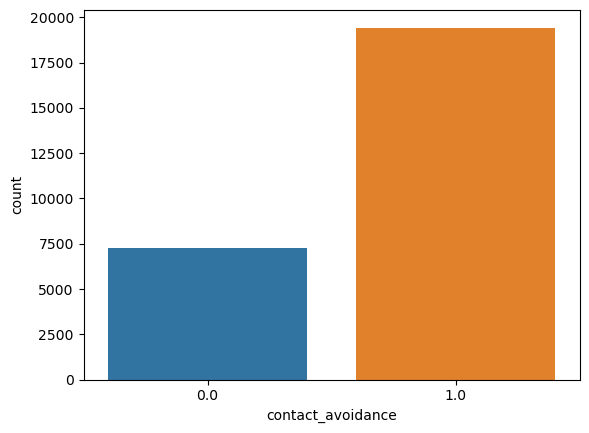

In [49]:
sns.countplot(data.contact_avoidance)

<AxesSubplot:xlabel='contact_avoidance', ylabel='count'>

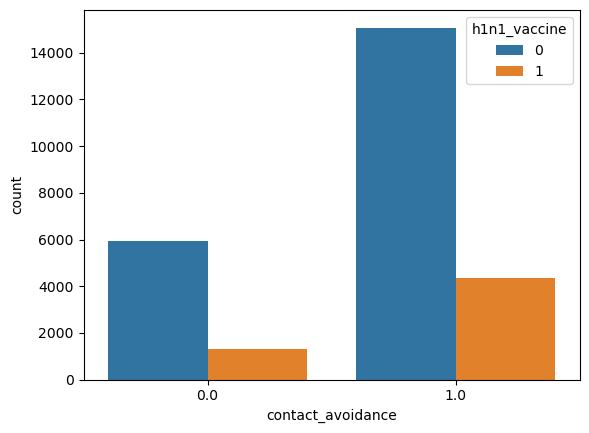

In [50]:
sns.countplot(data.contact_avoidance,hue=data.h1n1_vaccine)

In [51]:
ct_contact_avoidance=pd.crosstab(data.contact_avoidance,data.h1n1_vaccine)
ct_contact_avoidance

h1n1_vaccine,0,1
contact_avoidance,,
0.0,5954,1317
1.0,15079,4357


In [52]:
chi2_contingency(ct_contact_avoidance,correction=False)

(58.587201164415866,
 1.9447747613873533e-14,
 1,
 array([[ 5726.24941027,  1544.75058973],
        [15306.75058973,  4129.24941027]]))

## contact_avoidance it is a good predictor

In [53]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# bought_face_mask

In [54]:
data.bought_face_mask.isnull().sum()

19

In [55]:
data.bought_face_mask.value_counts()

0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64

In [56]:
data.bought_face_mask.fillna(data.bought_face_mask.mode().iloc[0],inplace=True)

<AxesSubplot:xlabel='bought_face_mask', ylabel='count'>

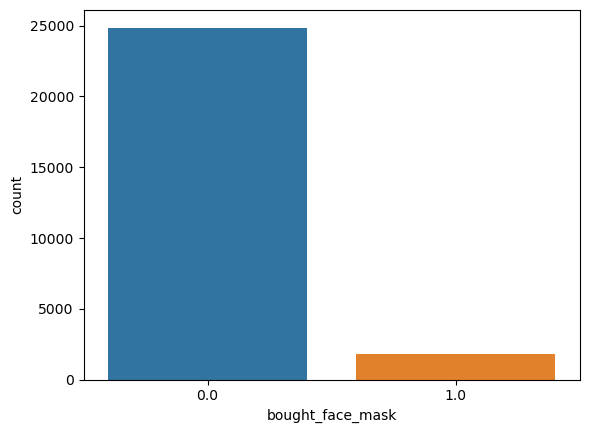

In [57]:
sns.countplot(data.bought_face_mask)

<AxesSubplot:xlabel='bought_face_mask', ylabel='count'>

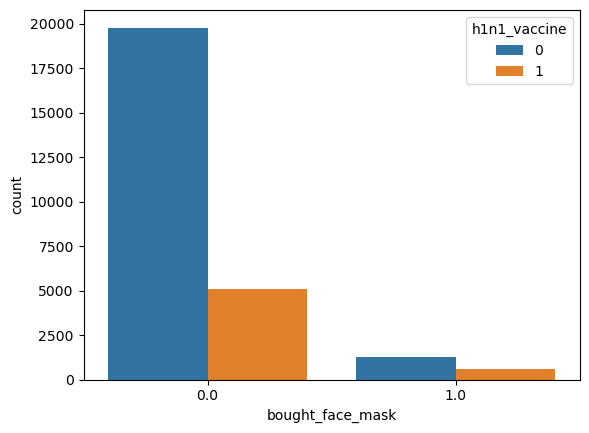

In [58]:
sns.countplot(data.bought_face_mask,hue=data.h1n1_vaccine)

In [59]:
ct_bought_face_mask=pd.crosstab(data.bought_face_mask,data.h1n1_vaccine)
ct_bought_face_mask

h1n1_vaccine,0,1
bought_face_mask,,
0.0,19778,5088
1.0,1255,586


In [60]:
chi2_contingency(ct_bought_face_mask,correction=False)

(132.4120533980558,
 1.2157495033471819e-30,
 1,
 array([[19583.12719512,  5282.87280488],
        [ 1449.87280488,   391.12719512]]))

## bought_face_mask is a good predictor

# wash_hands_frequently

In [61]:
data.wash_hands_frequently.isnull().sum()

42

In [62]:
data.wash_hands_frequently.value_counts()

1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64

In [63]:
data.wash_hands_frequently.fillna(data.wash_hands_frequently.mode().iloc[0],inplace=True)

In [64]:
data.wash_hands_frequently.isnull().sum()

0

<AxesSubplot:xlabel='wash_hands_frequently', ylabel='count'>

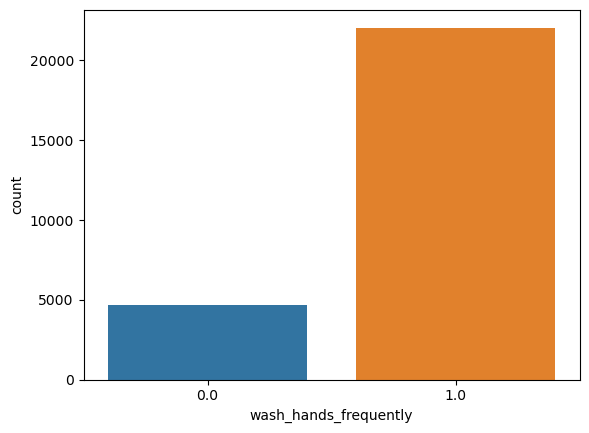

In [65]:
sns.countplot(data.wash_hands_frequently)

<AxesSubplot:xlabel='wash_hands_frequently', ylabel='count'>

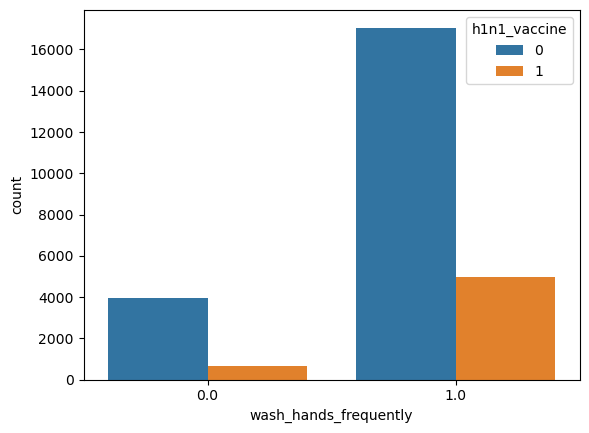

In [66]:
sns.countplot(data.wash_hands_frequently,hue=data.h1n1_vaccine)

In [67]:
ct_wash_hands_frequently=pd.crosstab(data.wash_hands_frequently,data.h1n1_vaccine)
ct_wash_hands_frequently

h1n1_vaccine,0,1
wash_hands_frequently,,
0.0,3971,679
1.0,17062,4995


In [68]:
chi2_contingency(ct_wash_hands_frequently,correction=False)

(148.50736844984505,
 3.6747179620018487e-34,
 1,
 array([[ 3662.09046317,   987.90953683],
        [17370.90953683,  4686.09046317]]))

## wash_hands_frequently is a good predictor

## avoid_large_gatherings

In [69]:
data.avoid_large_gatherings.isnull().sum()

87

In [70]:
data.avoid_large_gatherings.fillna(data.avoid_large_gatherings.mode().iloc[0],inplace=True)

In [71]:
data.avoid_large_gatherings.isnull().sum()

0

In [72]:
data.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

<AxesSubplot:xlabel='avoid_large_gatherings', ylabel='count'>

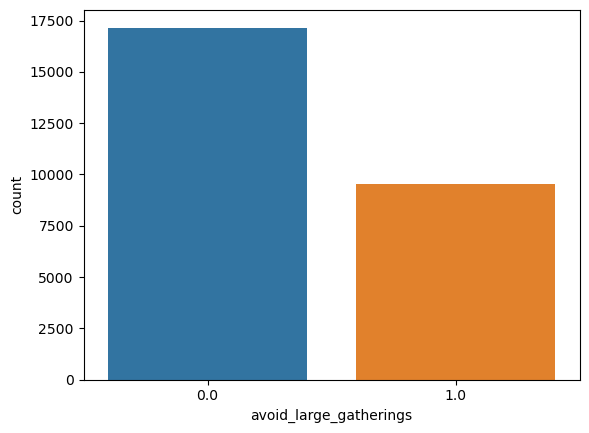

In [73]:
sns.countplot(data.avoid_large_gatherings)

<AxesSubplot:xlabel='avoid_large_gatherings', ylabel='count'>

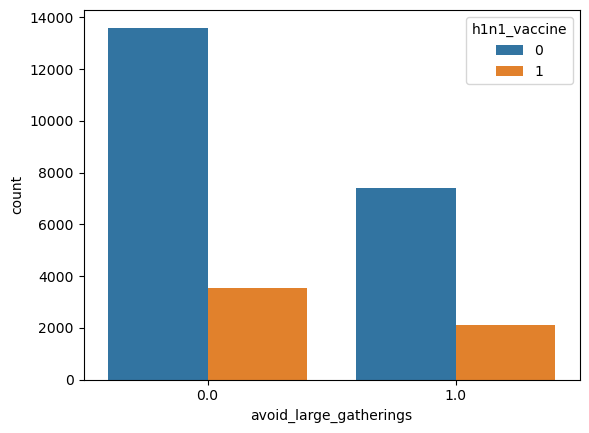

In [74]:
sns.countplot(data.avoid_large_gatherings,hue=data.h1n1_vaccine)

In [75]:
ch_avoid_large_gatherings=pd.crosstab(data.avoid_large_gatherings,data.h1n1_vaccine)
ch_avoid_large_gatherings

h1n1_vaccine,0,1
avoid_large_gatherings,,
0.0,13609,3551
1.0,7424,2123


In [76]:
chi2_contingency(ch_avoid_large_gatherings,correction=False)

(8.738667138185196,
 0.0031153215196716723,
 1,
 array([[13514.29512862,  3645.70487138],
        [ 7518.70487138,  2028.29512862]]))

## avoid_large_gatherings is a good predictor (p-value =0.0031) 

In [77]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# reduced_outside_home_cont

In [78]:
data.reduced_outside_home_cont.isnull().sum()

82

In [79]:
data.reduced_outside_home_cont.fillna(data.reduced_outside_home_cont.mode().iloc[0],inplace=True)

In [80]:
data.reduced_outside_home_cont.isnull().sum()

0

In [81]:
data.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

<AxesSubplot:xlabel='reduced_outside_home_cont', ylabel='count'>

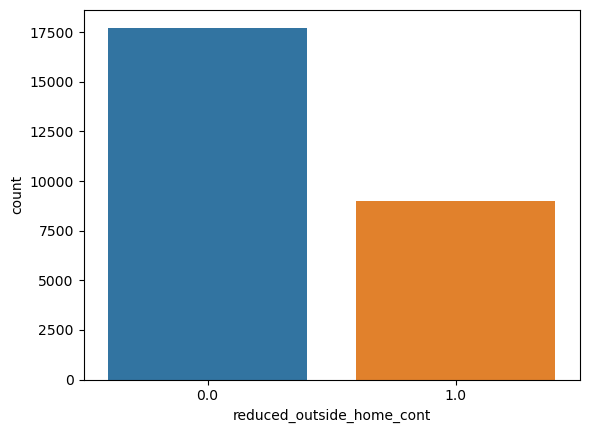

In [82]:
sns.countplot(data.reduced_outside_home_cont)

Text(0.5, 1.0, 'reduced_outside_home_cont vs h1n1_vaccine')

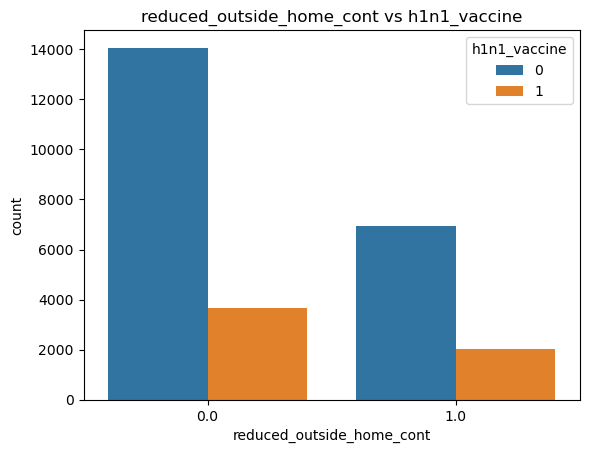

In [83]:
sns.countplot(data.reduced_outside_home_cont,hue=data.h1n1_vaccine)
plt.title('reduced_outside_home_cont vs h1n1_vaccine')

In [84]:
ct_reduced_outside_home_cont=pd.crosstab(data.reduced_outside_home_cont,data.h1n1_vaccine)
ct_reduced_outside_home_cont

h1n1_vaccine,0,1
reduced_outside_home_cont,,
0.0,14074,3652
1.0,6959,2022


In [85]:
chi2_contingency(ct_reduced_outside_home_cont,correction=False)

(13.019843626723468,
 0.0003082075507773056,
 1,
 array([[13960.04635489,  3765.95364511],
        [ 7072.95364511,  1908.04635489]]))

## reduced_outside_home_cont is a good predictor where p-value(0.00030)

In [86]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## avoid_touch_face

In [87]:
data.avoid_touch_face.isnull().sum()

128

In [88]:
data.avoid_touch_face.value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [89]:
data.avoid_touch_face.fillna(data.avoid_touch_face.mode().iloc[0],inplace=True)

In [90]:
data.avoid_touch_face.isnull().sum()

0

<AxesSubplot:xlabel='avoid_touch_face', ylabel='count'>

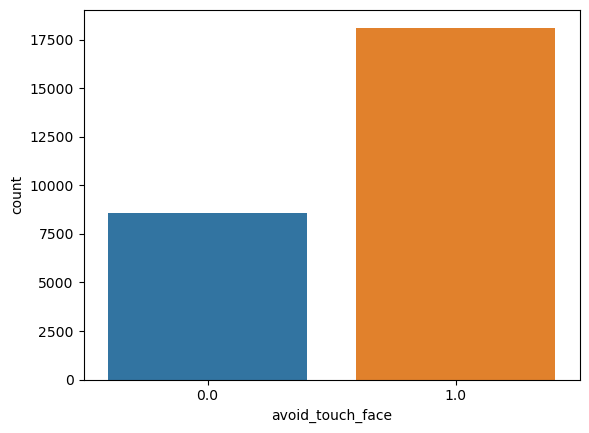

In [91]:
sns.countplot(data.avoid_touch_face)

<AxesSubplot:xlabel='avoid_touch_face', ylabel='count'>

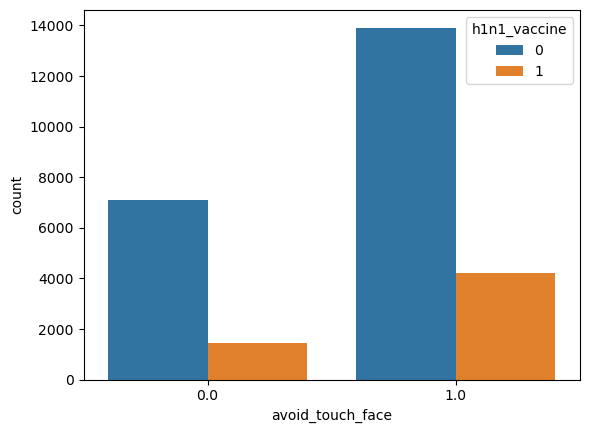

In [92]:
sns.countplot(data.avoid_touch_face,hue=data.h1n1_vaccine)

In [93]:
ct_avoid_touch_face=pd.crosstab(data.avoid_touch_face,data.h1n1_vaccine)
ct_avoid_touch_face

h1n1_vaccine,0,1
avoid_touch_face,,
0.0,7117,1461
1.0,13916,4213


In [94]:
chi2_contingency(ct_avoid_touch_face,correction=False)

(134.08102789784252,
 5.245058803488217e-31,
 1,
 array([[ 6755.57247164,  1822.42752836],
        [14277.42752836,  3851.57247164]]))

## avoid_touch_face  is a good predictor

In [95]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## dr_recc_h1n1_vacc

In [96]:
data.dr_recc_h1n1_vacc.isnull().sum()

2160

In [97]:
data.dr_recc_h1n1_vacc.value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [98]:
data.dr_recc_h1n1_vacc.fillna(data.dr_recc_h1n1_vacc.mode().iloc[0],inplace=True)

In [99]:
data.dr_recc_h1n1_vacc.isnull().sum()

0

<AxesSubplot:xlabel='dr_recc_h1n1_vacc', ylabel='count'>

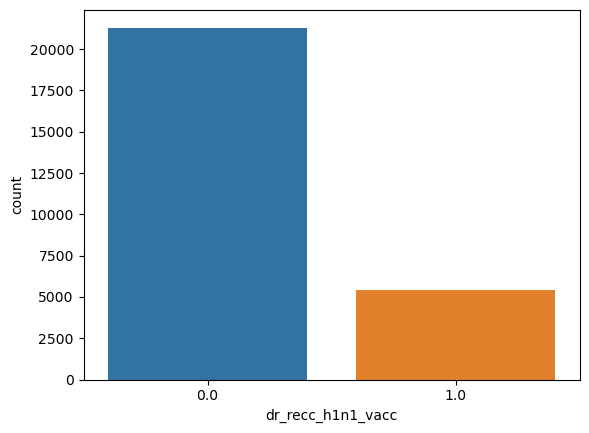

In [100]:
sns.countplot(data.dr_recc_h1n1_vacc)

<AxesSubplot:xlabel='dr_recc_h1n1_vacc', ylabel='count'>

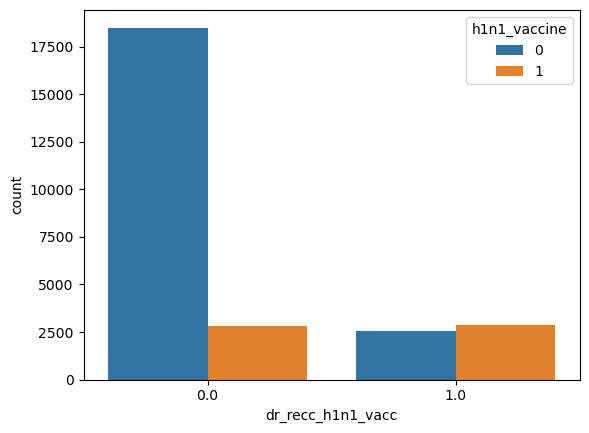

In [101]:
sns.countplot(data.dr_recc_h1n1_vacc,hue=data.h1n1_vaccine)

In [102]:
ct_dr_recc_h1n1_vacc=pd.crosstab(data.dr_recc_h1n1_vacc,data.h1n1_vaccine)
ct_dr_recc_h1n1_vacc

h1n1_vaccine,0,1
dr_recc_h1n1_vacc,,
0.0,18504,2795
1.0,2529,2879


In [103]:
chi2_contingency(ct_dr_recc_h1n1_vacc,correction=False)

(4147.691754581108,
 0.0,
 1,
 array([[16773.94941401,  4525.05058599],
        [ 4259.05058599,  1148.94941401]]))

## dr_recc_h1n1_vacc  is not a good predictor

In [104]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [105]:
data.dr_recc_seasonal_vacc.isnull().sum()

2160

In [106]:
data.dr_recc_seasonal_vacc.value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [107]:
data.dr_recc_seasonal_vacc.fillna(data.dr_recc_seasonal_vacc.mode().iloc[0],inplace=True)

In [108]:
data.dr_recc_seasonal_vacc.isnull().sum()

0

<AxesSubplot:xlabel='dr_recc_seasonal_vacc', ylabel='count'>

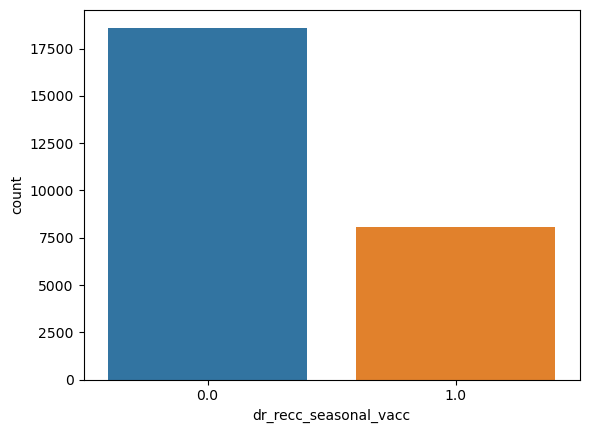

In [109]:
sns.countplot(data.dr_recc_seasonal_vacc)

<AxesSubplot:xlabel='dr_recc_seasonal_vacc', ylabel='count'>

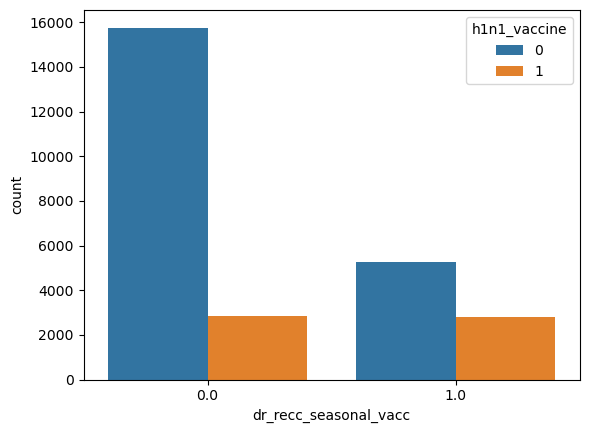

In [110]:
sns.countplot(data.dr_recc_seasonal_vacc,hue=data.h1n1_vaccine)

In [111]:
ct_dr_recc_seasonal_vacc=pd.crosstab(data.dr_recc_seasonal_vacc,data.h1n1_vaccine)
ct_dr_recc_seasonal_vacc

h1n1_vaccine,0,1
dr_recc_seasonal_vacc,,
0.0,15758,2855
1.0,5275,2819


In [112]:
chi2_contingency(ct_dr_recc_seasonal_vacc,correction=False)

(1280.6094117596108,
 1.8496635782763457e-280,
 1,
 array([[14658.59995507,  3954.40004493],
        [ 6374.40004493,  1719.59995507]]))

## dr_recc_seasonal_vacc  is a good predictor

In [113]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# chronic_medic_condition

In [114]:
data.chronic_medic_condition.isnull().sum()

971

In [115]:
data.chronic_medic_condition.value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [116]:
data.chronic_medic_condition.fillna(data.chronic_medic_condition.mode().iloc[0],inplace=True)

In [117]:
data.chronic_medic_condition.isnull().sum()

0

<AxesSubplot:xlabel='chronic_medic_condition', ylabel='count'>

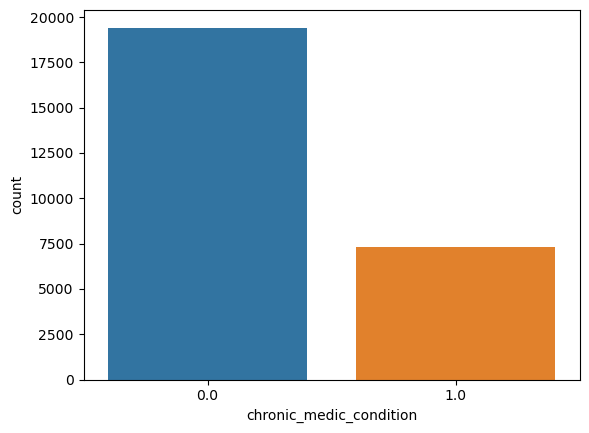

In [118]:
sns.countplot(data.chronic_medic_condition)

<AxesSubplot:xlabel='chronic_medic_condition', ylabel='count'>

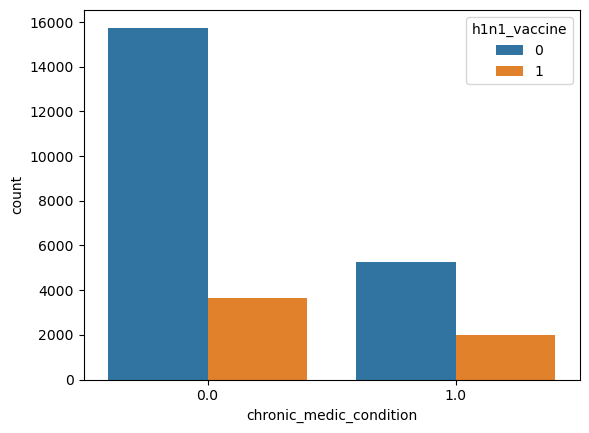

In [119]:
sns.countplot(data.chronic_medic_condition,hue=data.h1n1_vaccine)

In [120]:
ct_chronic_medic_condition=pd.crosstab(data.chronic_medic_condition,data.h1n1_vaccine)
ct_chronic_medic_condition

h1n1_vaccine,0,1
chronic_medic_condition,,
0.0,15751,3666
1.0,5282,2008


In [121]:
chi2_contingency(ct_chronic_medic_condition,correction=False)

(237.79518652408973,
 1.189768159211186e-53,
 1,
 array([[15291.78720935,  4125.21279065],
        [ 5741.21279065,  1548.78720935]]))

## chronic_medic_condition  is a good predictor

In [122]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# cont_child_undr_6_mnths

In [123]:
data.cont_child_undr_6_mnths.isnull().sum()

820

In [124]:
data.cont_child_undr_6_mnths.value_counts()

0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [125]:
data.cont_child_undr_6_mnths.fillna(data.cont_child_undr_6_mnths.mode().iloc[0],inplace=True)

In [126]:
data.cont_child_undr_6_mnths.isnull().sum()

0

<AxesSubplot:xlabel='cont_child_undr_6_mnths', ylabel='count'>

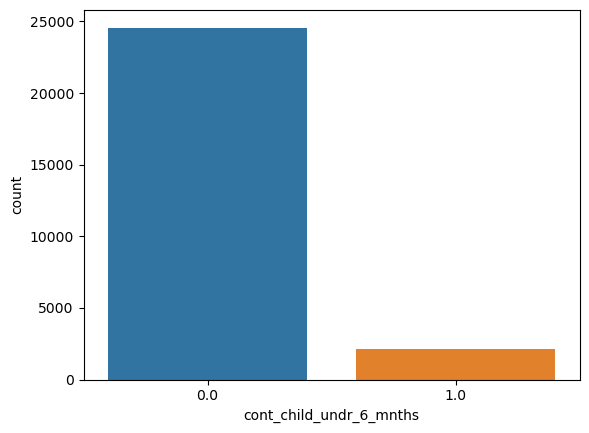

In [127]:
sns.countplot(data.cont_child_undr_6_mnths)

<AxesSubplot:xlabel='cont_child_undr_6_mnths', ylabel='count'>

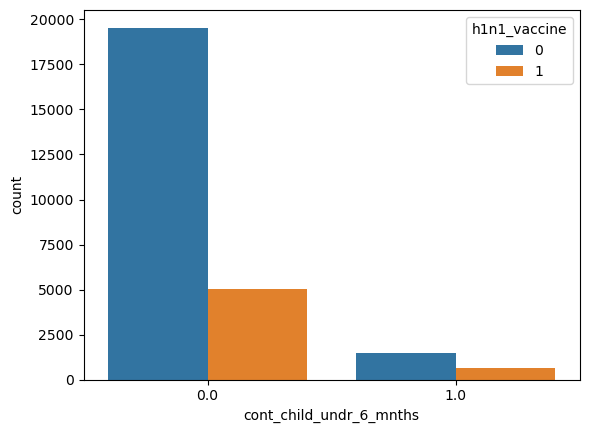

In [128]:
sns.countplot(data.cont_child_undr_6_mnths,hue=data.h1n1_vaccine)

In [129]:
ct_cont_child_undr_6_mnths=pd.crosstab(data.cont_child_undr_6_mnths,data.h1n1_vaccine)
ct_cont_child_undr_6_mnths

h1n1_vaccine,0,1
cont_child_undr_6_mnths,,
0.0,19547,5022
1.0,1486,652


In [130]:
chi2_contingency(ct_cont_child_undr_6_mnths,correction=False)

(118.85796008992361,
 1.1250395097834935e-27,
 1,
 array([[19349.22593328,  5219.77406672],
        [ 1683.77406672,   454.22593328]]))

## cont_child_undr_6_mnths is a good predictor

In [131]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_health_worker

In [132]:
data.is_health_worker.isnull().sum()

804

In [133]:
data.is_health_worker.value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [134]:
data.is_health_worker.fillna(data.is_health_worker.mode().iloc[0],inplace=True)

In [135]:
data.is_health_worker.isnull().sum()

0

<AxesSubplot:xlabel='is_health_worker', ylabel='count'>

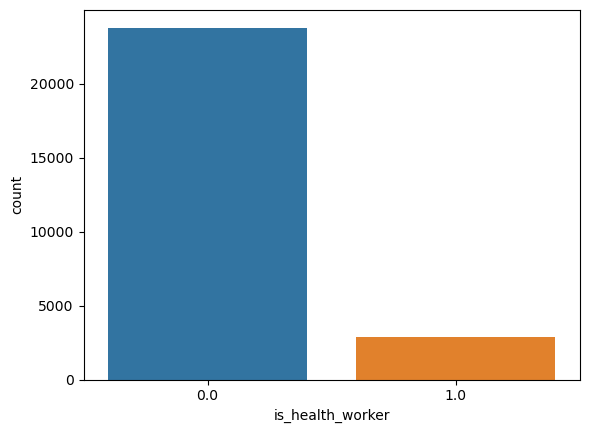

In [136]:
sns.countplot(data.is_health_worker)

<AxesSubplot:xlabel='is_health_worker', ylabel='count'>

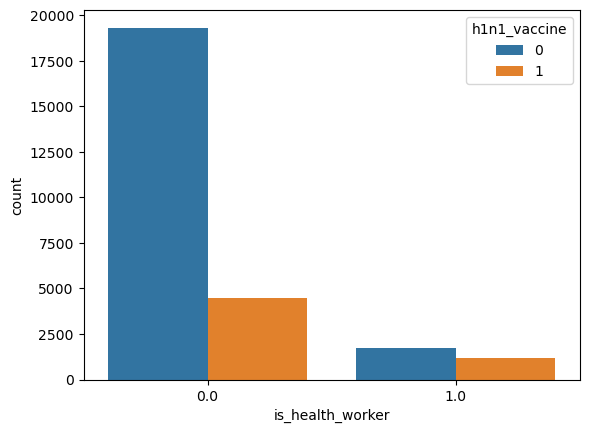

In [137]:
sns.countplot(data.is_health_worker,hue=data.h1n1_vaccine)

In [138]:
ct_is_health_worker=pd.crosstab(data.is_health_worker,data.h1n1_vaccine)
ct_is_health_worker

h1n1_vaccine,0,1
is_health_worker,,
0.0,19321,4487
1.0,1712,1187


In [139]:
chi2_contingency(ct_is_health_worker,correction=False)

(754.2809399216384,
 4.7051623310562056e-166,
 1,
 array([[18749.90317145,  5058.09682855],
        [ 2283.09682855,   615.90317145]]))

## is_health_worker is a good predictor

In [140]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# has_health_insur

In [141]:
data.has_health_insur.isnull().sum()

12274

In [142]:
data.has_health_insur.value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

In [143]:
data.has_health_insur.fillna(data.has_health_insur.mode().iloc[0],inplace=True)

In [144]:
data.has_health_insur.isnull().sum()

0

<AxesSubplot:xlabel='has_health_insur', ylabel='count'>

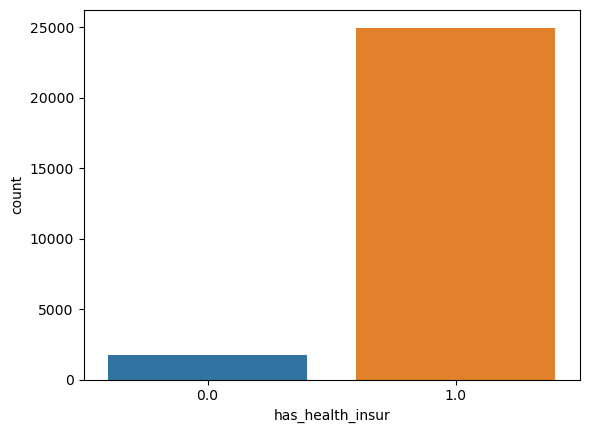

In [145]:
sns.countplot(data.has_health_insur)

<AxesSubplot:xlabel='has_health_insur', ylabel='count'>

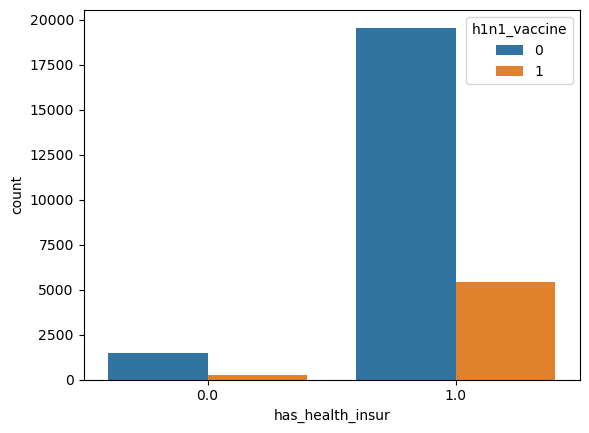

In [146]:
sns.countplot(data.has_health_insur,hue=data.h1n1_vaccine)

In [147]:
ct_has_health_insur=pd.crosstab(data.has_health_insur,data.h1n1_vaccine)
ct_has_health_insur

h1n1_vaccine,0,1
has_health_insur,,
0.0,1480,256
1.0,19553,5418


In [148]:
chi2_contingency(ct_has_health_insur,correction=False)

(46.86708224278411,
 7.596804097525478e-12,
 1,
 array([[ 1367.18043959,   368.81956041],
        [19665.81956041,  5305.18043959]]))

## has_health_insur is a good predictor

In [149]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_h1n1_vacc_effective

In [150]:
data.is_h1n1_vacc_effective.isnull().sum()

391

In [151]:
data.is_h1n1_vacc_effective.value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [152]:
data.is_h1n1_vacc_effective.fillna(data.is_h1n1_vacc_effective.mode().iloc[0],inplace=True)

In [153]:
data.is_h1n1_vacc_effective.isnull().sum()

0

<AxesSubplot:xlabel='is_h1n1_vacc_effective', ylabel='count'>

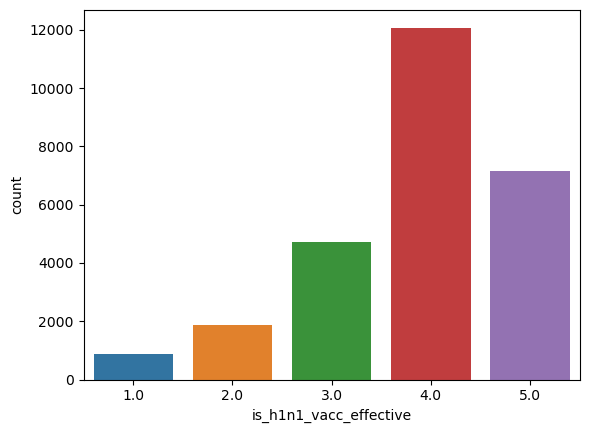

In [154]:
sns.countplot(data.is_h1n1_vacc_effective)

<AxesSubplot:xlabel='is_h1n1_vacc_effective', ylabel='count'>

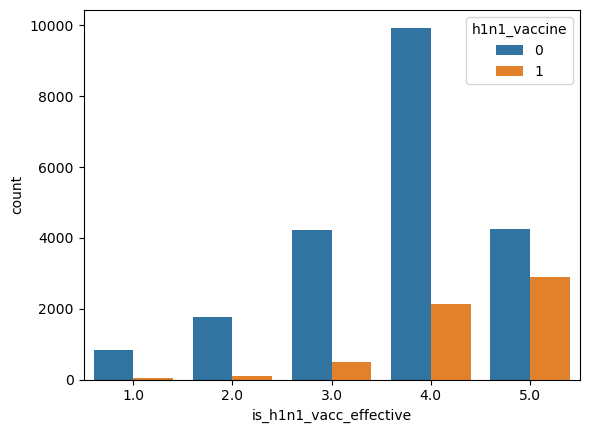

In [155]:
sns.countplot(data.is_h1n1_vacc_effective,hue=data.h1n1_vaccine)

In [156]:
ct_is_h1n1_vacc_effective=pd.crosstab(data.is_h1n1_vacc_effective,data.h1n1_vaccine)
ct_is_h1n1_vacc_effective

h1n1_vaccine,0,1
is_h1n1_vacc_effective,,
1.0,844,42
2.0,1763,95
3.0,4224,499
4.0,9937,2137
5.0,4265,2901


In [157]:
chi2_contingency(ct_is_h1n1_vacc_effective,correction=False)

(2430.9882283574093,
 0.0,
 4,
 array([[ 697.76605384,  188.23394616],
        [1463.2610926 ,  394.7389074 ],
        [3719.58134571, 1003.41865429],
        [9508.83446287, 2565.16553713],
        [5643.55704497, 1522.44295503]]))

# is_h1n1_vacc_effective is a bad predictor

In [158]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_h1n1_risky

In [159]:
data.is_h1n1_risky.isnull().sum()

388

In [160]:
data.is_h1n1_risky.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: is_h1n1_risky, dtype: int64

In [161]:
data.is_h1n1_risky.fillna(data.is_h1n1_risky.mode().iloc[0],inplace=True)

In [162]:
data.is_h1n1_risky.isnull().sum()

0

<AxesSubplot:xlabel='is_h1n1_risky', ylabel='count'>

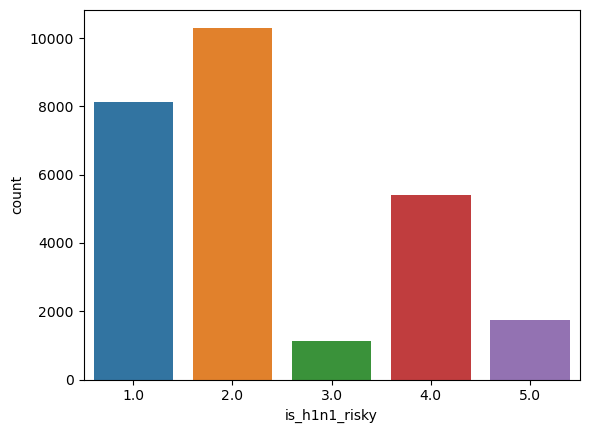

In [163]:
sns.countplot(data.is_h1n1_risky)

<AxesSubplot:xlabel='is_h1n1_risky', ylabel='count'>

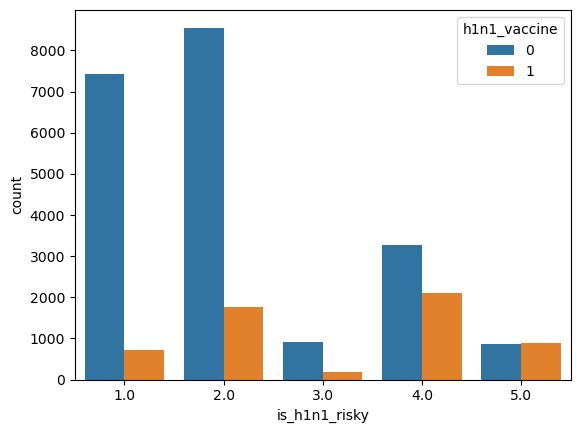

In [164]:
sns.countplot(data.is_h1n1_risky,hue=data.h1n1_vaccine)

In [165]:
ct_is_h1n1_risky=pd.crosstab(data.is_h1n1_risky,data.h1n1_vaccine)
ct_is_h1n1_risky

h1n1_vaccine,0,1
is_h1n1_risky,,
1.0,7420,719
2.0,8555,1752
3.0,923,194
4.0,3279,2115
5.0,856,894


In [166]:
chi2_contingency(ct_is_h1n1_risky,correction=False)

(2842.259854334096,
 0.0,
 4,
 array([[6409.83963006, 1729.16036994],
        [8117.24008687, 2189.75991313],
        [ 879.6892575 ,  237.3107425 ],
        [4248.02493728, 1145.97506272],
        [1378.20608829,  371.79391171]]))

# _is_h1n1_risky is not a good predictor

In [167]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# sick_from_h1n1_vacc

In [168]:
data.sick_from_h1n1_vacc.isnull().sum()

395

In [169]:
data.sick_from_h1n1_vacc.value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [170]:
data.sick_from_h1n1_vacc.fillna(data.sick_from_h1n1_vacc.mode().iloc[0],inplace=True)

In [171]:
data.sick_from_h1n1_vacc.isnull().sum()

0

<AxesSubplot:xlabel='sick_from_h1n1_vacc', ylabel='count'>

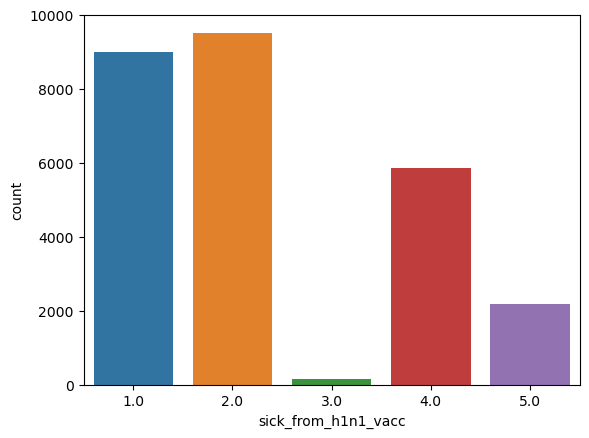

In [172]:
sns.countplot(data.sick_from_h1n1_vacc)

<AxesSubplot:xlabel='sick_from_h1n1_vacc', ylabel='count'>

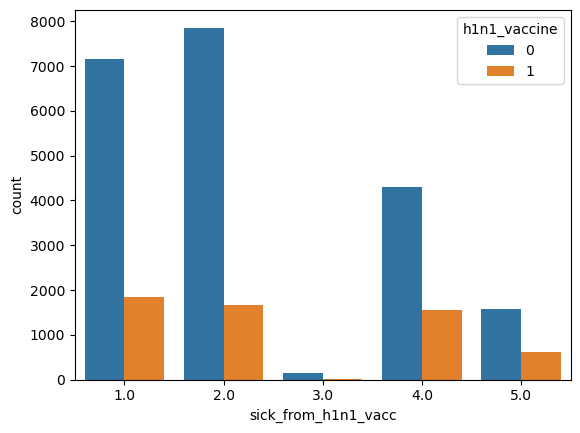

In [173]:
sns.countplot(data.sick_from_h1n1_vacc,hue=data.h1n1_vaccine)

In [174]:
ct_sick_from_h1n1_vacc=pd.crosstab(data.sick_from_h1n1_vacc,data.h1n1_vaccine)
ct_sick_from_h1n1_vacc

h1n1_vaccine,0,1
sick_from_h1n1_vacc,,
1.0,7157,1841
2.0,7862,1662
3.0,136,12
4.0,4304,1546
5.0,1574,613


In [175]:
chi2_contingency(ct_sick_from_h1n1_vacc,correction=False)

(254.59089268297026,
 6.675769368968441e-54,
 4,
 array([[7086.34193283, 1911.65806717],
        [7500.59130565, 2023.40869435],
        [ 116.55685775,   31.44314225],
        [4607.14606657, 1242.85393343],
        [1722.3638372 ,  464.6361628 ]]))

# sick_from_h1n1_vacc is a good predictor

In [176]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_seas_vacc_effective

In [177]:
data.is_seas_vacc_effective.isnull().sum()

462

In [178]:
data.is_seas_vacc_effective.value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

In [179]:
data.is_seas_vacc_effective.fillna(data.is_seas_vacc_effective.mode().iloc[0],inplace=True)

In [180]:
data.is_seas_vacc_effective.isnull().sum()

0

<AxesSubplot:xlabel='is_seas_vacc_effective', ylabel='count'>

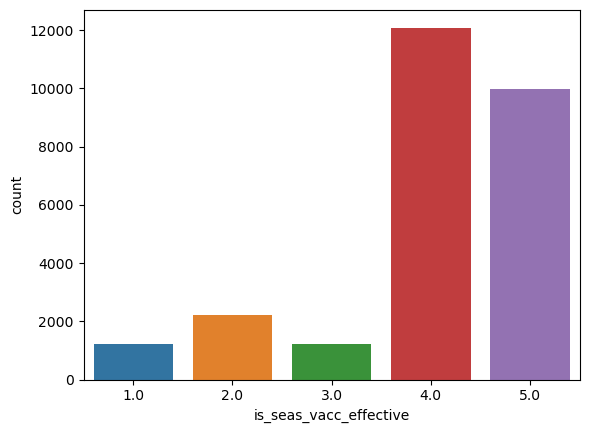

In [181]:
sns.countplot(data.is_seas_vacc_effective)

<AxesSubplot:xlabel='is_seas_vacc_effective', ylabel='count'>

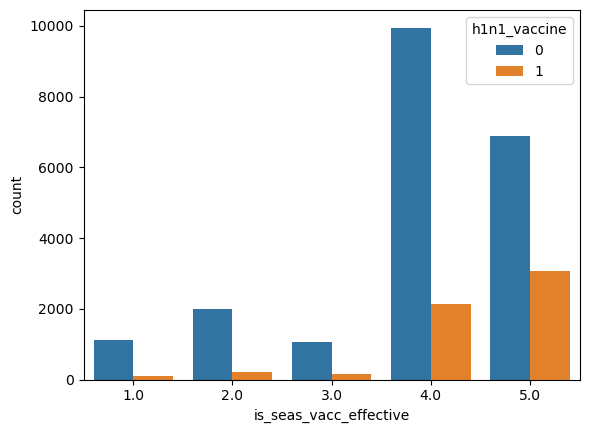

In [182]:
sns.countplot(data.is_seas_vacc_effective,hue=data.h1n1_vaccine)

In [183]:
ct_is_seas_vacc_effective=pd.crosstab(data.is_seas_vacc_effective,data.h1n1_vaccine)
ct_is_seas_vacc_effective

h1n1_vaccine,0,1
is_seas_vacc_effective,,
1.0,1132,89
2.0,2001,205
3.0,1054,162
4.0,9949,2142
5.0,6897,3076


In [184]:
chi2_contingency(ct_is_seas_vacc_effective,correction=False)

(1015.2358583203843,
 1.7812550798256757e-218,
 4,
 array([[ 961.59407646,  259.40592354],
        [1737.32721758,  468.67278242],
        [ 957.65634478,  258.34365522],
        [9522.22275059, 2568.77724941],
        [7854.19961059, 2118.80038941]]))

# _is_seas_vacc_effective is a good predictor

In [185]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_seas_risky

In [186]:
data.is_seas_risky.isnull().sum()

514

In [187]:
data.is_seas_risky.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [188]:
data.is_seas_risky.fillna(data.is_seas_risky.mode().iloc[0],inplace=True)

In [189]:
data.is_seas_risky.isnull().sum()

0

<AxesSubplot:xlabel='is_seas_risky', ylabel='count'>

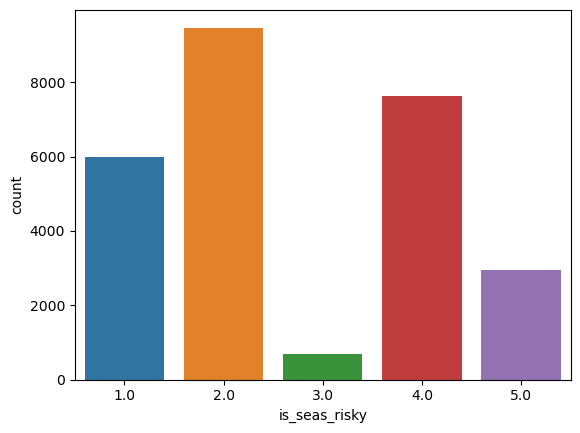

In [190]:
sns.countplot(data.is_seas_risky)

<AxesSubplot:xlabel='is_seas_risky', ylabel='count'>

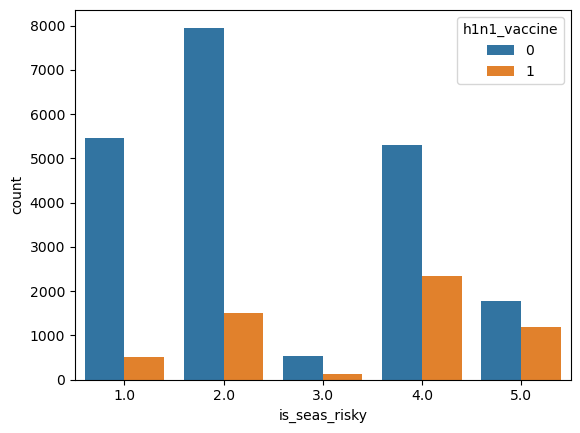

In [191]:
sns.countplot(data.is_seas_risky,hue=data.h1n1_vaccine)

In [192]:
ct_is_seas_risky=pd.crosstab(data.is_seas_risky,data.h1n1_vaccine)
ct_is_seas_risky

h1n1_vaccine,0,1
is_seas_risky,,
1.0,5468,506
2.0,7953,1515
3.0,541,136
4.0,5295,2335
5.0,1776,1182


In [193]:
chi2_contingency(ct_is_seas_risky,correction=False)

(1757.3448032431027,
 0.0,
 4,
 array([[4704.80181226, 1269.19818774],
        [7456.48871082, 2011.51128918],
        [ 533.16886958,  143.83113042],
        [6008.97854495, 1621.02145505],
        [2329.56206238,  628.43793762]]))

## is_seas_risky  is not a good predictor

In [194]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# sick_from_seas_vacc

In [195]:
data.sick_from_seas_vacc.isnull().sum()

537

In [196]:
data.sick_from_seas_vacc.value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [197]:
data.sick_from_seas_vacc.fillna(data.sick_from_seas_vacc.mode().iloc[0],inplace=True)

In [198]:
data.sick_from_seas_vacc.isnull().sum()

0

<AxesSubplot:xlabel='sick_from_seas_vacc', ylabel='count'>

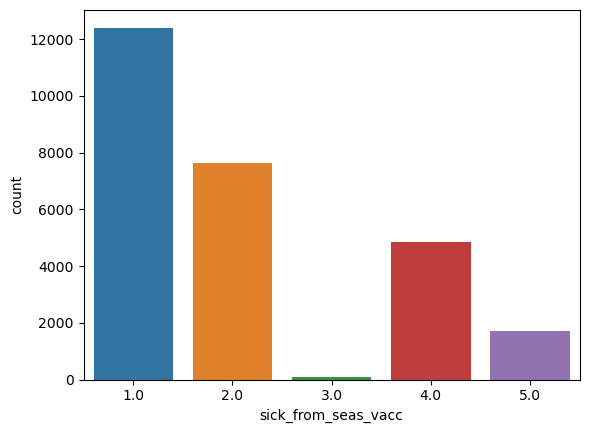

In [199]:
sns.countplot(data.sick_from_seas_vacc)

<AxesSubplot:xlabel='sick_from_seas_vacc', ylabel='count'>

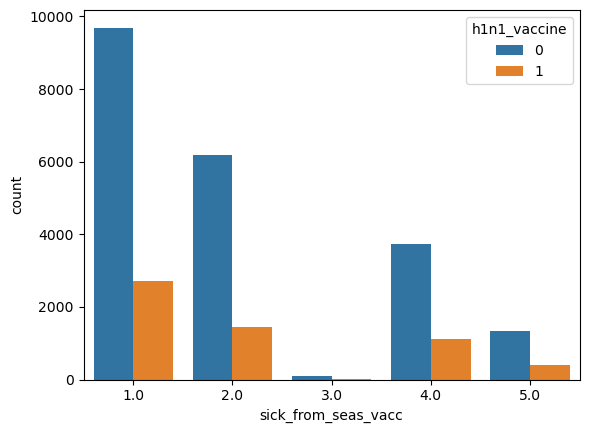

In [200]:
sns.countplot(data.sick_from_seas_vacc,hue=data.h1n1_vaccine)

In [201]:
ct_sick_from_seas_vacc=pd.crosstab(data.sick_from_seas_vacc,data.h1n1_vaccine)
ct_sick_from_seas_vacc

h1n1_vaccine,0,1
sick_from_seas_vacc,,
1.0,9691,2716
2.0,6183,1450
3.0,86,8
4.0,3740,1112
5.0,1333,388


In [202]:
chi2_contingency(ct_sick_from_seas_vacc,correction=False)

(45.127510978784706,
 3.7405030013106724e-09,
 4,
 array([[9771.08739282, 2635.91260718],
        [6011.34118396, 1621.65881604],
        [  74.0293556 ,   19.9706444 ],
        [3821.17482308, 1030.82517692],
        [1355.36724454,  365.63275546]]))

## sick_from_seas_vacc is a good predictor

In [203]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# age_bracket

In [204]:
data.age_bracket.isnull().sum()

0

In [205]:
data.age_bracket.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

<AxesSubplot:xlabel='age_bracket', ylabel='count'>

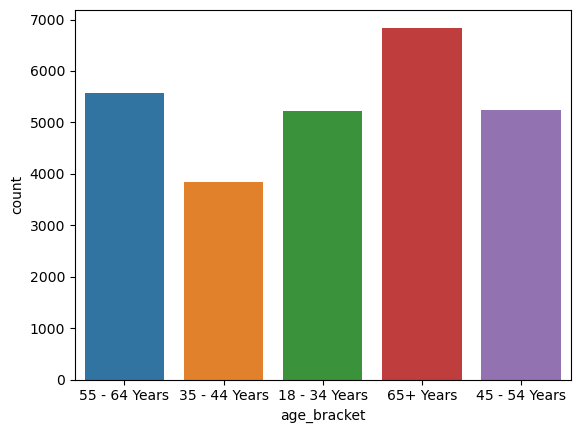

In [206]:
sns.countplot(data.age_bracket)

<AxesSubplot:xlabel='age_bracket', ylabel='count'>

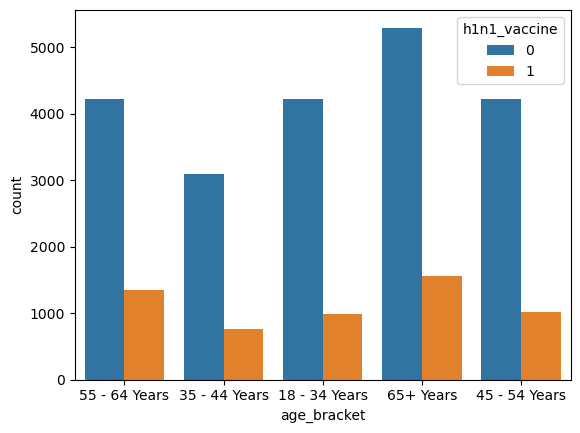

In [207]:
sns.countplot(data.age_bracket,hue=data.h1n1_vaccine)

In [208]:
ct_age_bracket=pd.crosstab(data.age_bracket,data.h1n1_vaccine)
ct_age_bracket

h1n1_vaccine,0,1
age_bracket,,
18 - 34 Years,4224,991
35 - 44 Years,3087,761
45 - 54 Years,4218,1020
55 - 64 Years,4212,1351
65+ Years,5292,1551


In [209]:
chi2_contingency(ct_age_bracket,correction=False)

(69.44576247937547,
 2.9716028185463074e-14,
 4,
 array([[4107.05414311, 1107.94585689],
        [3030.47830157,  817.52169843],
        [4125.16770884, 1112.83229116],
        [4381.12026809, 1181.87973191],
        [5389.17957839, 1453.82042161]]))

## age_bracket is a good predictor

In [210]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# qualification

In [211]:
data.qualification.isnull().sum()

1407

In [212]:
data.qualification.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [213]:
data.qualification.describe()

count                25300
unique                   4
top       College Graduate
freq                 10097
Name: qualification, dtype: object

In [214]:
data.qualification.head()

0          < 12 Years
1            12 Years
2    College Graduate
3            12 Years
4        Some College
Name: qualification, dtype: object

In [215]:
data.qualification.replace(['< 12 Years','12 Years','Some College','College Graduate'],[0,1,2,3],inplace=True)

In [216]:
data.qualification.fillna(data.qualification.mode().iloc[0],inplace=True)

In [217]:
data.qualification.isnull().sum()

0

<AxesSubplot:xlabel='qualification', ylabel='count'>

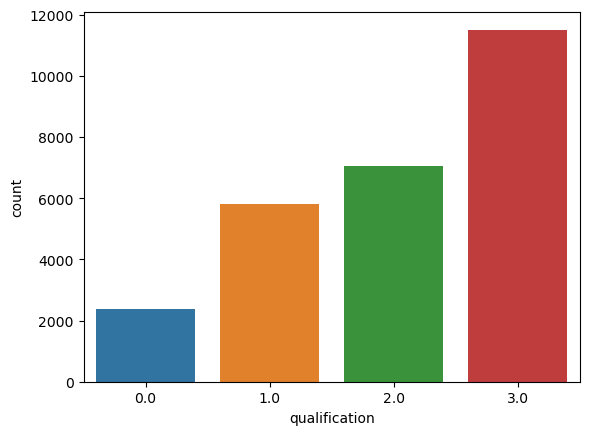

In [218]:
sns.countplot(data.qualification)

<AxesSubplot:xlabel='qualification', ylabel='count'>

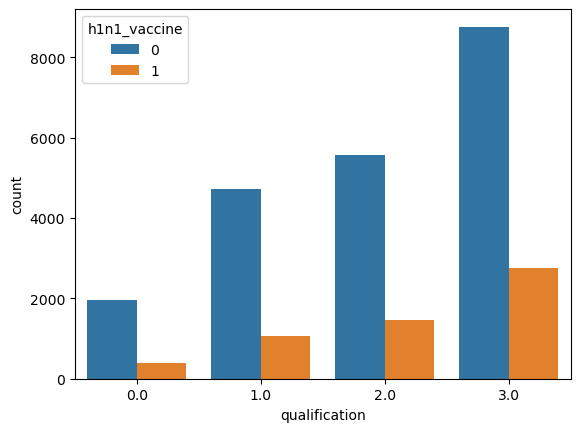

In [219]:
sns.countplot(data.qualification,hue=data.h1n1_vaccine)

In [220]:
ct_qualification=pd.crosstab(data.qualification,data.h1n1_vaccine)
ct_qualification

h1n1_vaccine,0,1
qualification,,
0.0,1968,395
1.0,4726,1071
2.0,5579,1464
3.0,8760,2744


In [221]:
chi2_contingency(ct_qualification,correction=False)

(103.18537711307252,
 3.209804092590849e-22,
 3,
 array([[1860.97199236,  502.02800764],
        [4565.40611076, 1231.59388924],
        [5546.68884562, 1496.31115438],
        [9059.93305126, 2444.06694874]]))

## qualification is a good predictor

In [222]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# race

In [223]:
data.race.isnull().sum()

0

In [224]:
data.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

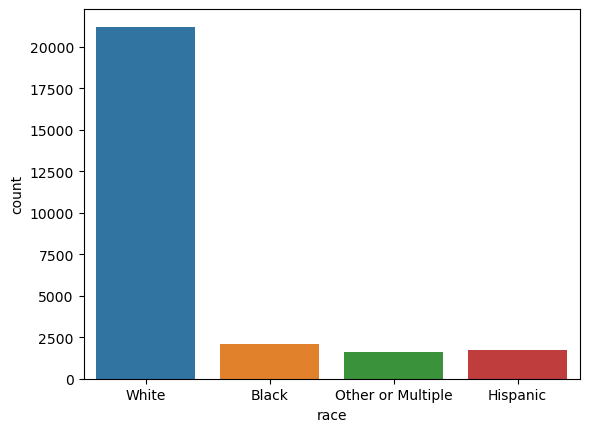

In [225]:
sns.countplot(data.race)

<AxesSubplot:xlabel='race', ylabel='count'>

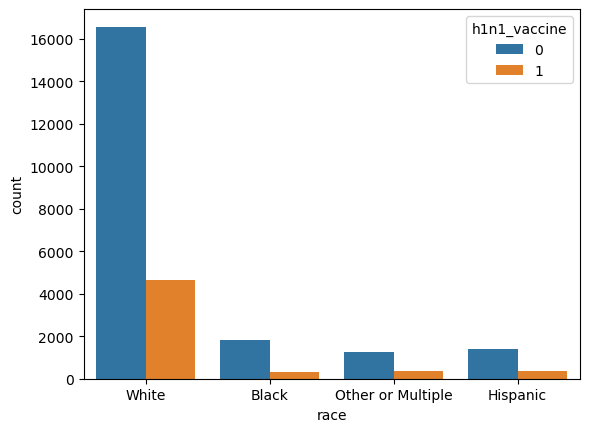

In [226]:
sns.countplot(data.race,hue=data.h1n1_vaccine)

In [227]:
ct_race=pd.crosstab(data.race,data.h1n1_vaccine)
ct_race

h1n1_vaccine,0,1
race,,
Black,1803,315
Hispanic,1390,365
Other or Multiple,1263,349
White,16577,4645


In [228]:
chi2_contingency(ct_race,correction=False)

(57.01119582422927,
 2.5557770361705444e-12,
 3,
 array([[ 1668.02314   ,   449.97686   ],
        [ 1382.14381997,   372.85618003],
        [ 1269.5246939 ,   342.4753061 ],
        [16713.30834613,  4508.69165387]]))

# race is a good predictor

In [229]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# sex

In [230]:
data.sex.isnull().sum()

0

In [231]:
data.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

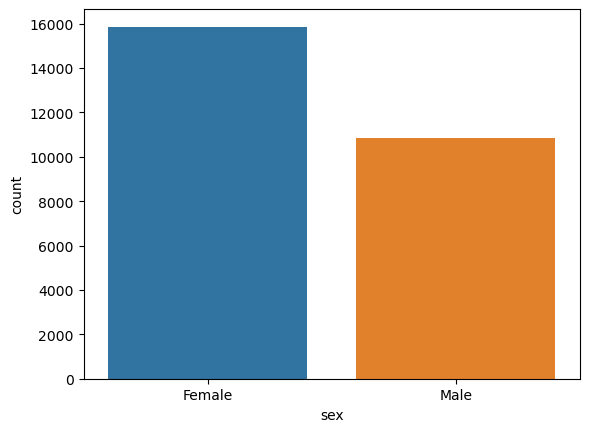

In [232]:
sns.countplot(data.sex)

<AxesSubplot:xlabel='sex', ylabel='count'>

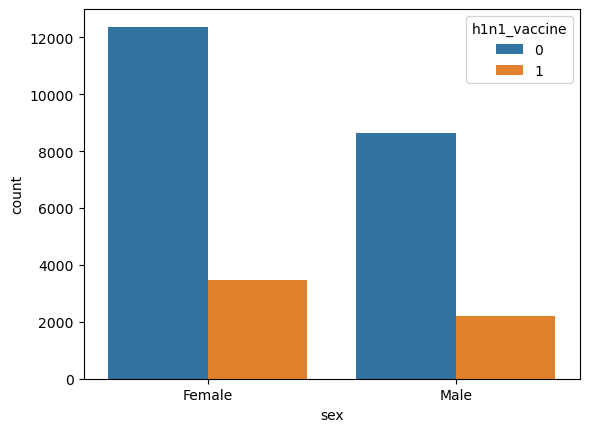

In [233]:
sns.countplot(data.sex,hue=data.h1n1_vaccine)

In [234]:
ct_sex=pd.crosstab(data.sex,data.h1n1_vaccine)
ct_sex

h1n1_vaccine,0,1
sex,,
Female,12378,3480
Male,8655,2194


In [235]:
chi2_contingency(ct_sex,correction=False)

(11.412649487692018,
 0.0007294572775631631,
 1,
 array([[12488.90979893,  3369.09020107],
        [ 8544.09020107,  2304.90979893]]))

## sex is a good predictor

In [236]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [237]:
data.income_level.isnull().sum()

4423

In [238]:
data.income_level.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [239]:
data.income_level.mode()

0    <= $75,000, Above Poverty
Name: income_level, dtype: object

In [240]:
data.income_level.fillna(data.income_level.mode().iloc[0],inplace=True)

In [241]:
data.income_level.isnull().sum()

0

<AxesSubplot:xlabel='income_level', ylabel='count'>

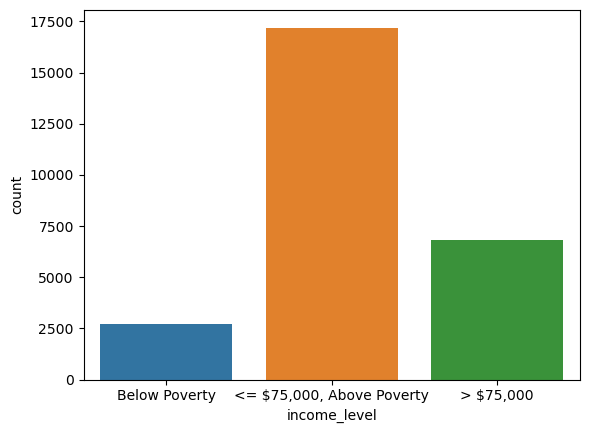

In [242]:
sns.countplot(data.income_level)

<AxesSubplot:xlabel='income_level', ylabel='count'>

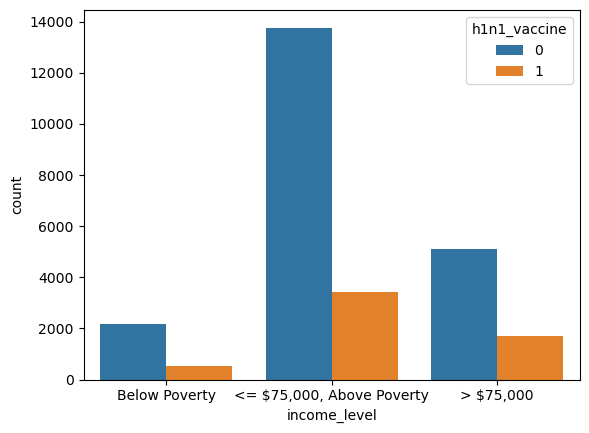

In [243]:
sns.countplot(data.income_level,hue=data.h1n1_vaccine)

In [244]:
ct_income_level=pd.crosstab(data.income_level,data.h1n1_vaccine)
ct_income_level

h1n1_vaccine,0,1
income_level,,
"<= $75,000, Above Poverty",13765,3435
"> $75,000",5087,1723
Below Poverty,2181,516


In [245]:
chi2_contingency(ct_income_level,correction=False)

(90.84009217768136,
 1.880722047715149e-20,
 2,
 array([[13545.79698206,  3654.20301794],
        [ 5363.19054929,  1446.80945071],
        [ 2124.01246864,   572.98753136]]))

## income_level is a good predictor

In [246]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# marital_status

In [247]:
data.marital_status.isnull().sum()

1408

In [248]:
data.marital_status.value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [249]:
data.marital_status

0        Not Married
1        Not Married
2        Not Married
3        Not Married
4            Married
            ...     
26702    Not Married
26703    Not Married
26704    Not Married
26705        Married
26706        Married
Name: marital_status, Length: 26707, dtype: object

In [250]:
data.marital_status.replace(['Not Married','Married'],[0,1],inplace=True)

In [251]:
data.marital_status.fillna(data.marital_status.mode().iloc[0],inplace=True)

In [252]:
data.marital_status.isnull().sum()

0

In [253]:
data.marital_status.astype('int')

0        0
1        0
2        0
3        0
4        1
        ..
26702    0
26703    0
26704    0
26705    1
26706    1
Name: marital_status, Length: 26707, dtype: int32

<AxesSubplot:xlabel='marital_status', ylabel='count'>

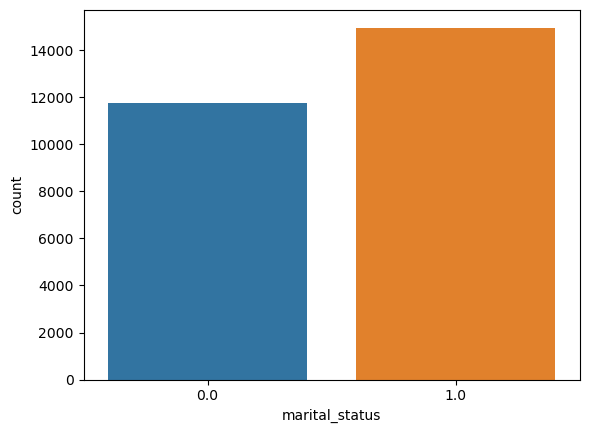

In [254]:
sns.countplot(data.marital_status)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

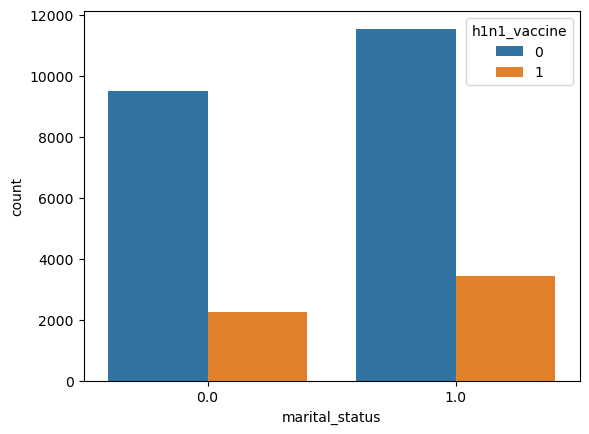

In [255]:
sns.countplot(data.marital_status,hue=data.h1n1_vaccine)

In [256]:
ct_marital_status=pd.crosstab(data.marital_status,data.h1n1_vaccine)
ct_marital_status

h1n1_vaccine,0,1
marital_status,,
0.0,9494,2250
1.0,11539,3424


In [257]:
chi2_contingency(ct_marital_status,correction=False)

(54.54816163124884,
 1.5168447863996744e-13,
 1,
 array([[ 9248.94417194,  2495.05582806],
        [11784.05582806,  3178.94417194]]))

## marital_status is a good predictor

In [258]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## housing_status

In [259]:
data.housing_status.isnull().sum()

2042

In [260]:
data.housing_status.value_counts()

Own     18736
Rent     5929
Name: housing_status, dtype: int64

In [261]:
data.housing_status.head()

0     Own
1    Rent
2     Own
3    Rent
4     Own
Name: housing_status, dtype: object

In [262]:
data.housing_status.replace(['Own','Rent'],[0,1],inplace=True)

In [263]:
data.housing_status.fillna(data.housing_status.mode().iloc[0],inplace=True)

In [264]:
data.housing_status.isnull().sum()

0

<AxesSubplot:xlabel='housing_status', ylabel='count'>

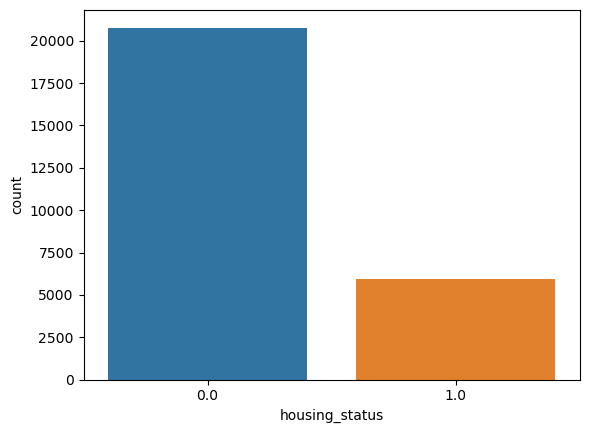

In [265]:
sns.countplot(data.housing_status)

<AxesSubplot:xlabel='housing_status', ylabel='count'>

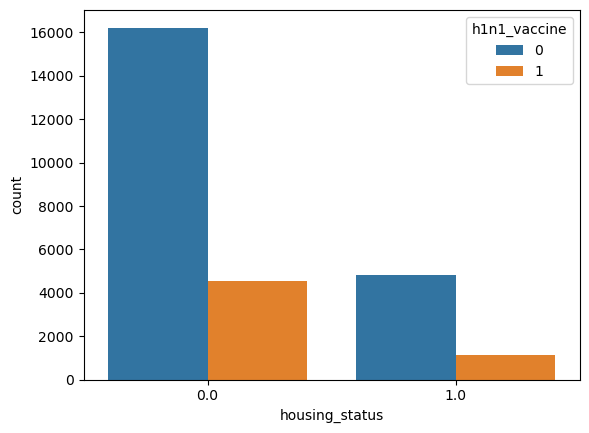

In [266]:
sns.countplot(data.housing_status,hue=data.h1n1_vaccine)

In [267]:
ct_housing_status=pd.crosstab(data.housing_status,data.h1n1_vaccine)
ct_housing_status

h1n1_vaccine,0,1
housing_status,,
0.0,16223,4555
1.0,4810,1119


In [268]:
chi2_contingency(ct_housing_status,correction=False)

(25.627340211011663,
 4.1413001799506495e-07,
 1,
 array([[16363.63777287,  4414.36222713],
        [ 4669.36222713,  1259.63777287]]))

## housing_status is a good predictor

In [269]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# employment

In [270]:
data.employment.isnull().sum()

1463

In [271]:
data.employment.value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64

In [272]:
data.employment.head()

0    Not in Labor Force
1              Employed
2              Employed
3    Not in Labor Force
4              Employed
Name: employment, dtype: object

In [273]:
data.employment.replace(['Employed','Not in Labor Force','Unemployed'],[0,1,2],inplace=True)

In [274]:
data.employment.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: employment, dtype: float64

In [275]:
data.employment.fillna(data.employment.mode().iloc[0],inplace=True)

In [276]:
data.employment.isnull().sum()

0

<AxesSubplot:xlabel='employment', ylabel='count'>

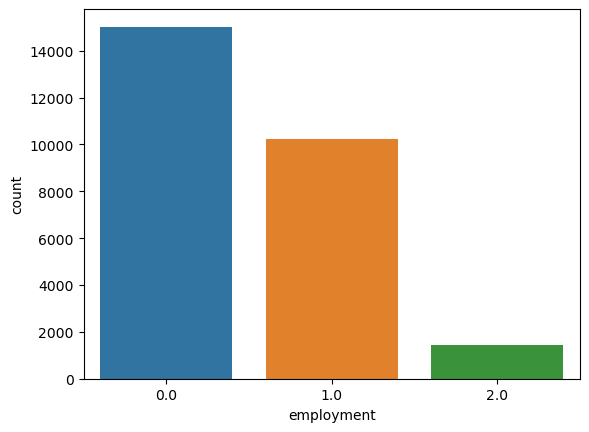

In [277]:
sns.countplot(data.employment)

<AxesSubplot:xlabel='employment', ylabel='count'>

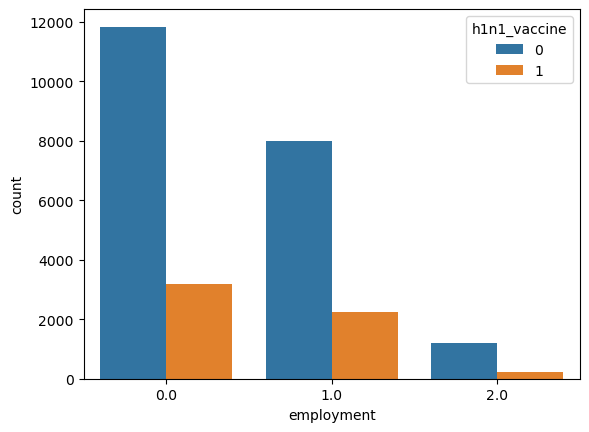

In [278]:
sns.countplot(data.employment,hue=data.h1n1_vaccine)

In [279]:
ct_employment=pd.crosstab(data.employment,data.h1n1_vaccine)
ct_employment

h1n1_vaccine,0,1
employment,,
0.0,11829,3194
1.0,7988,2243
2.0,1216,237


In [280]:
chi2_contingency(ct_employment,correction=False)

(23.957973424416053,
 6.274688521364308e-06,
 2,
 array([[11831.30860823,  3191.69139177],
        [ 8057.38656532,  2173.61343468],
        [ 1144.30482645,   308.69517355]]))

## employment is a good predictor

In [281]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [282]:
data.census_msa.isnull().sum()

0

In [283]:
data.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

<AxesSubplot:xlabel='census_msa', ylabel='count'>

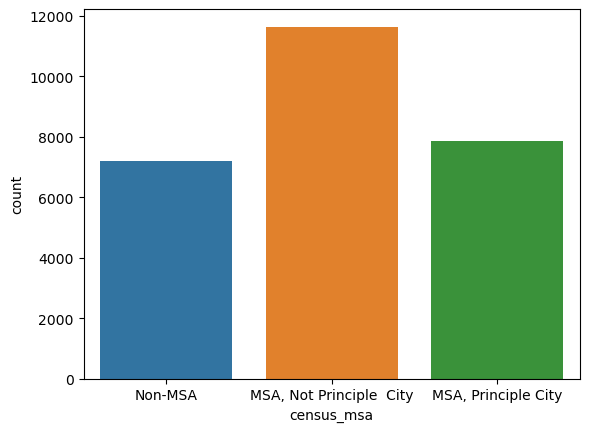

In [284]:
sns.countplot(data.census_msa)

<AxesSubplot:xlabel='census_msa', ylabel='count'>

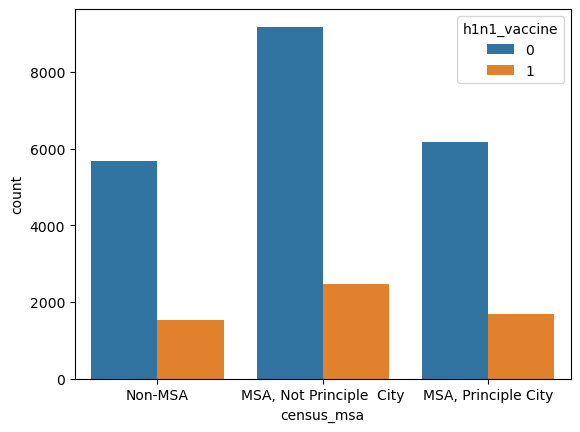

In [285]:
sns.countplot(data.census_msa,hue=data.h1n1_vaccine)

In [286]:
ct_census_msa=pd.crosstab(data.census_msa,data.h1n1_vaccine)
ct_census_msa

h1n1_vaccine,0,1
census_msa,,
"MSA, Not Principle City",9178,2467
"MSA, Principle City",6183,1681
Non-MSA,5672,1526


In [287]:
chi2_contingency(ct_census_msa,correction=False)

(0.11411029118541836,
 0.9445419806029446,
 2,
 array([[9170.97708466, 2474.02291534],
        [6193.26438761, 1670.73561239],
        [5668.75852773, 1529.24147227]]))

## census_msa is not a good predictor

# no_of_adults

In [288]:
data.no_of_adults.isnull().sum()

249

In [289]:
data.no_of_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

In [290]:
data.no_of_adults.fillna(data.no_of_adults.mode().iloc[0],inplace=True)

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

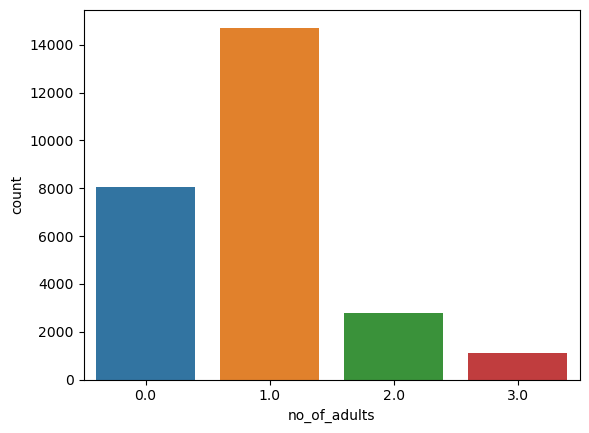

In [291]:
sns.countplot(data.no_of_adults)

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

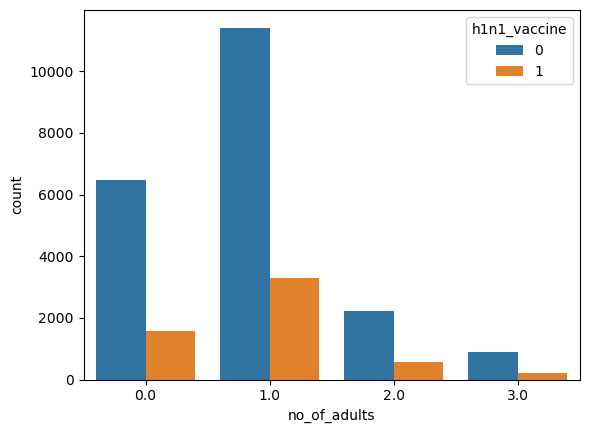

In [292]:
sns.countplot(data.no_of_adults,hue=data.h1n1_vaccine)

In [293]:
ct_no_of_adults=pd.crosstab(data.no_of_adults,data.h1n1_vaccine)
ct_no_of_adults

h1n1_vaccine,0,1
no_of_adults,,
0.0,6471,1585
1.0,11419,3304
2.0,2240,563
3.0,903,222


In [294]:
chi2_contingency(ct_no_of_adults,correction=False)

(28.248225641051818,
 3.221377736825649e-06,
 3,
 array([[ 6344.47328416,  1711.52671584],
        [11595.04470738,  3127.95529262],
        [ 2207.49238027,   595.50761973],
        [  885.98962819,   239.01037181]]))

## no_of_adults is a good predictor

In [295]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# no_of_children

In [296]:
data.no_of_children.isnull().sum()

249

In [297]:
data.no_of_children.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64

In [298]:
data.no_of_children.fillna(data.no_of_children.mode().iloc[0],inplace=True)

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

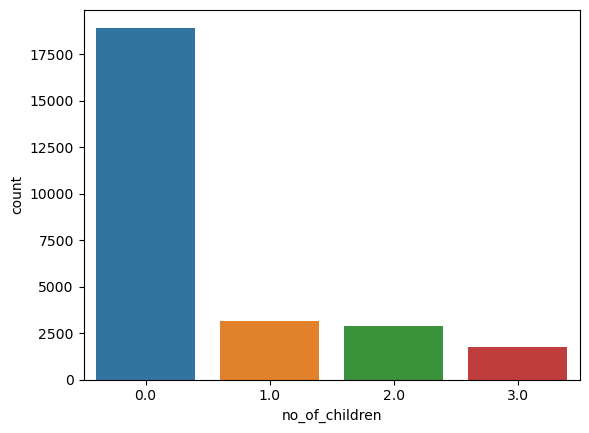

In [299]:
sns.countplot(data.no_of_children)

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

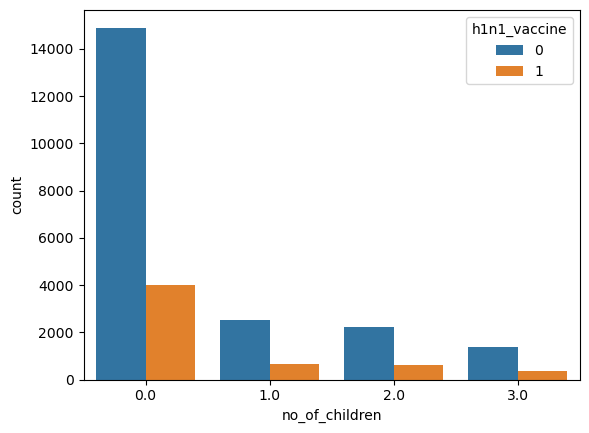

In [300]:
sns.countplot(data.no_of_children,hue=data.h1n1_vaccine)

In [301]:
ct_no_of_children=pd.crosstab(data.no_of_children,data.h1n1_vaccine)
ct_no_of_children

h1n1_vaccine,0,1
no_of_children,,
0.0,14899,4022
1.0,2501,674
2.0,2235,629
3.0,1398,349


In [302]:
chi2_contingency(ct_no_of_children,correction=False)

(2.561284667933834,
 0.4643173046901464,
 3,
 array([[14901.16422661,  4019.83577339],
        [ 2500.45961733,   674.54038267],
        [ 2255.53270678,   608.46729322],
        [ 1375.84344928,   371.15655072]]))

# no_of_children is not a good predictor

In [303]:
Cleaned_h1n1_vaccine_prediction_data = data.copy(deep=True)

In [304]:
# building the model using the logestic regression

In [305]:
data.isnull().sum()

unique_id               0
h1n1_worry              0
h1n1_awareness          0
antiviral_medication    0
contact_avoidance       0
                       ..
employment              0
census_msa              0
no_of_adults            0
no_of_children          0
h1n1_vaccine            0
Length: 34, dtype: int64

In [306]:
data.head(2)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,0.0,White,Female,Below Poverty,0.0,0.0,1.0,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,1.0,White,Male,Below Poverty,0.0,1.0,0.0,"MSA, Not Principle City",0.0,0.0,0


In [307]:
data.age_bracket.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [308]:
data.age_bracket.replace({'18 - 34 Years':0,'35 - 44 Years':1,'45 - 54 Years':2,'55 - 64 Years':3,'65+ Years':4},inplace=True)

In [309]:
data.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [310]:
data.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [311]:
data.income_level.value_counts()

<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [312]:
data.income_level.replace({'Below Poverty':0,'> $75,000':1,'<= $75,000, Above Poverty':2},inplace=True)

In [313]:
data.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [314]:
non_encoded_features = data.drop(['race','sex','census_msa'],axis=1)

In [315]:
encoded_features = pd.get_dummies(data[['race','sex','census_msa']],drop_first=True)

In [316]:
final_data = pd.concat([non_encoded_features,encoded_features],axis=1)

In [317]:
final_data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,income_level,marital_status,housing_status,employment,no_of_adults,no_of_children,h1n1_vaccine,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,0.0,0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1.0,0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0,3.0,2,0.0,0.0,0.0,2.0,0.0,0,0,0,1,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4,1.0,0,0.0,1.0,1.0,0.0,0.0,0,0,0,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2,2.0,2,1.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0


In [318]:
final_data.drop('unique_id',axis=1,inplace=True)

In [319]:
final_data.shape

(26707, 36)

In [320]:
final_data[final_data.duplicated()]

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,income_level,marital_status,housing_status,employment,no_of_adults,no_of_children,h1n1_vaccine,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"census_msa_MSA, Principle City",census_msa_Non-MSA
15409,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,2.0,2.0,3,3.0,1,1.0,0.0,1.0,1.0,0.0,0,0,0,1,0,1,0
17564,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,5.0,4.0,1.0,1,3.0,1,1.0,0.0,0.0,1.0,2.0,0,0,0,1,0,1,0
18054,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2.0,2,1.0,0.0,0.0,1.0,0.0,0,0,0,1,1,0,0
19790,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,3,3.0,2,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
20138,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,4.0,2.0,2.0,2,3.0,1,1.0,0.0,0.0,1.0,0.0,0,0,0,1,1,0,0
21377,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,3,3.0,2,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
21873,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,1,3.0,1,1.0,0.0,0.0,1.0,2.0,0,0,0,1,1,0,0
22056,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,3,1.0,2,1.0,0.0,0.0,1.0,0.0,0,0,0,1,1,0,1
24118,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,0,3.0,2,1.0,0.0,0.0,1.0,0.0,0,0,0,1,1,1,0
25870,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,3.0,2,1.0,0.0,0.0,1.0,0.0,0,0,0,1,1,0,1


In [321]:
final_data = final_data.drop_duplicates()

In [322]:
final_data.reset_index(drop=True,inplace=True)

In [323]:
null_features = final_data.isnull().sum()
null_features[null_features>0]

Series([], dtype: int64)

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score

In [325]:
X = final_data.drop('h1n1_vaccine',axis=1)
y = final_data['h1n1_vaccine']

In [326]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)

In [327]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [328]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [329]:
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14742
           1       0.68      0.40      0.51      3945

    accuracy                           0.83     18687
   macro avg       0.77      0.68      0.70     18687
weighted avg       0.82      0.83      0.82     18687

[[13976   766]
 [ 2350  1595]]


In [330]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6281
           1       0.72      0.43      0.54      1729

    accuracy                           0.84      8010
   macro avg       0.79      0.69      0.72      8010
weighted avg       0.83      0.84      0.83      8010

[[5987  294]
 [ 982  747]]


In [331]:
final_data.h1n1_vaccine.value_counts()

0    21023
1     5674
Name: h1n1_vaccine, dtype: int64

In [332]:
final_data.h1n1_vaccine.value_counts(normalize=True)*100

0    78.746676
1    21.253324
Name: h1n1_vaccine, dtype: float64

### The Dataset is imbalanced so will make it balanced 

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance by creating synthetic samples of the minority class. When applying SMOTE, it is essential to consider whether to perform it on both the training and testing datasets.

SMOTE should only be applied to the training dataset and not the testing dataset. The purpose of SMOTE is to increase the representation of the minority class during the training phase, allowing the model to learn from a more balanced set of data. 

In [333]:
train = pd.concat([X_train,y_train],axis=1)

In [334]:
train = train.reset_index(drop=True)

In [346]:
len(train[train.h1n1_vaccine == 0])

14742

In [335]:
# Separate Minority and Majority classes

non_h1n1_vaccine = train[train.h1n1_vaccine == 0]
print('Non h1n1 vaccine',len(non_h1n1_vaccine))
h1n1_vaccine_yes = train[train.h1n1_vaccine ==1]
print('h1n1_vaccine_yes =',len(h1n1_vaccine_yes))

Non h1n1 vaccine 14742
h1n1_vaccine_yes = 3945


In [336]:
# unsample minority with replacement
from sklearn.utils import resample

In [337]:
h1n1_vaccine_upsampled1= resample(h1n1_vaccine_yes,replace=True,n_samples=len(non_h1n1_vaccine),random_state=27)

In [338]:
# combine majority and upsample minority

new_train = pd.concat([non_h1n1_vaccine,h1n1_vaccine_upsampled1])

In [339]:
# Check new Class counts
new_train.h1n1_vaccine.value_counts()

0    14742
1    14742
Name: h1n1_vaccine, dtype: int64

In [340]:
X_train = new_train.drop('h1n1_vaccine',axis=1)
y_train = new_train.h1n1_vaccine

In [341]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [342]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [343]:
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76     14742
           1       0.77      0.72      0.75     14742

    accuracy                           0.76     29484
   macro avg       0.76      0.76      0.76     29484
weighted avg       0.76      0.76      0.76     29484

[[11620  3122]
 [ 4089 10653]]


In [344]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6281
           1       0.49      0.75      0.59      1729

    accuracy                           0.78      8010
   macro avg       0.70      0.77      0.72      8010
weighted avg       0.83      0.78      0.79      8010

[[4942 1339]
 [ 439 1290]]
